### DATA

In [1]:
#Process the raw PHEME data set

from src.utils import DatasetCreator

dataset_creator = DatasetCreator()


/home/hp/anaconda3/envs/GNN_project/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data_example = dataset_creator.get_dataframe()

In [3]:
data_example

,id_post,class,subject,text,Media_url
0,500388199064420352,0,ferguson-all-rnr-threads,Hard to believe this guy assaulted a cop. 😂😂😂 ...,http://pbs.twimg.com/media/BvG8ak6IQAAE2zx.jpg
1,500306187624407040,0,ferguson-all-rnr-threads,The day #Ferguson cops beat a man and charged ...,http://pbs.twimg.com/media/BvFrRW0CUAIN9JE.jpg
2,500413818368184321,0,ferguson-all-rnr-threads,"Remarkably, despite the military-style police ...",NaN
3,500292426154528770,0,ferguson-all-rnr-threads,If Mike Brown was engaged in a robbery before ...,NaN
4,500360889347096576,0,ferguson-all-rnr-threads,so ... they clearly released that video only ...,NaN
5,500289307257868288,0,ferguson-all-rnr-threads,The selective release of information by #Fergu...,NaN
6,500309222635360256,0,ferguson-all-rnr-threads,"Every incident report I've seen says ""the susp...",NaN
7,500375190535421953,0,ferguson-all-rnr-threads,If anyone's looking for a reason to murder me ...,NaN
8,499404849835175938,0,ferguson-all-rnr-threads,#Ferguson is completely shut down. No journali...,NaN
9,500366333461422080,0,ferguson-all-rnr-threads,#Ferguson police chief says officer Darren Wil...,NaN


### PMIGraphConstructor

In [4]:
from src.utils import GraphConstructor

In [5]:
graph_constructor = GraphConstructor(window_size=5)

In [6]:
first_row = data_example.iloc[0]
graph = graph_constructor.construct_graph(row=first_row)

In [7]:
first_row.text

'Hard to believe this guy assaulted a cop. 😂😂😂 \n\n#Ferguson http://t.co/J86VLXnZF6'

In [8]:
graph.nodes['to']['embedding'].shape

(768,)

In [9]:
graph.graph

{'class': 0, 'subject': 'ferguson-all-rnr-threads'}

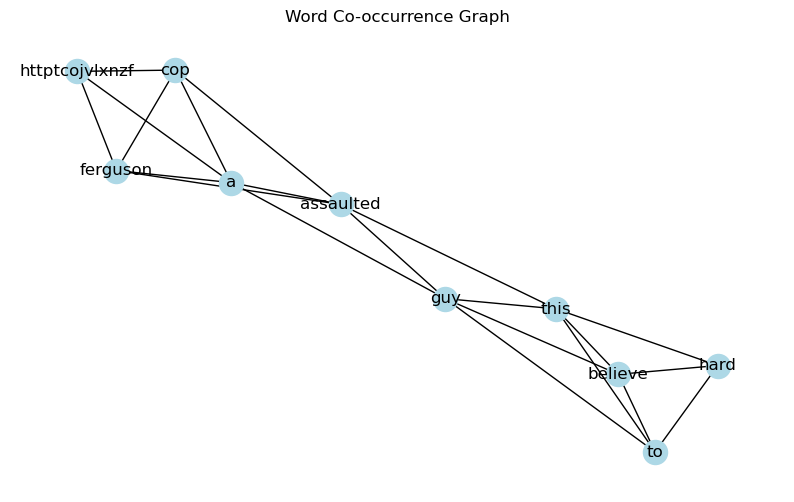

In [10]:
graph_constructor.visualize_graph(graph)

In [ ]:
import os
import torch
from torch_geometric.data import Dataset, Data
from typing import Optional, Callable, List

from src.utils.graph_utils import GraphConstructor

class PHEMEDataset(Dataset):
    def __init__(
        self,
        root: str,
        transform: Optional[Callable] = None,
        pre_transform: Optional[Callable] = None,
        pre_filter: Optional[Callable] = None
    ):
        """
        Initialize the PHEME dataset.
        
        Args:
            root (str): Root directory of the dataset
            transform (callable, optional): A function/transform that takes in a Data object and returns a transformed version
            pre_transform (callable, optional): A function/transform to be applied before saving
            pre_filter (callable, optional): A function that takes in a Data object and returns True if the object should be included
        """
        self.graph_constructor = GraphConstructor()
        super().__init__(root, transform, pre_transform, pre_filter)

    @property
    def raw_file_names(self):
        return []

    @property
    def processed_file_names(self):
        return ["graphs"]

    def download(self):
        pass

    def process(self):
        """
        Process raw data into PyG Data objects.
        """
        # Construct PyG graphs using graph constructor
        data_list = self.graph_constructor.construct_pyg_graphs()
        self.data_list = data_list

        #Save the data list
        torch.save(data_list, self.processed_paths[0])

    def len(self) -> int:
        return len(self.graph_constructor.data.df)

    def get(self, idx: int) -> Data:
        if not self.data_list:
            data_path = self.processed_paths[0]
            if not os.path.exists(data_path):
                raise ValueError("Processed data not found. Run process() first.")
            self.data_list = torch.load(data_path)
        
        return self.data_list[idx]

In [7]:
dataset = PHEMEDataset("data")

Processing...
Constructing nx graphs :: 14it [00:03,  3.58it/s]
Converting nx graph to pyg graphs: 100%|██████████| 14/14 [00:00<00:00, 814.51it/s]


IndexError: list index out of range

In [ ]:
dataset.get(0)

Data(edge_index=[2, 42], class=0, subject='ferguson-all-rnr-threads', x=[10, 768], edge_attr=[42, 1], y=0)